In [2]:
import pandas as pd
import numpy as np
import re
import string
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Import tqdm for the progress bar

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [3]:
print("🔵 Loading train and test datasets...")

# Load train data
df_train = pd.read_csv(r'/content/drive/MyDrive/Genre Classification Dataset/train_data.txt', sep=' :::', header=None, engine='python')
# Load test data
df_test = pd.read_csv(r'/content/drive/MyDrive/Genre Classification Dataset/test_data.txt', sep=' :::', header=None, engine='python')

# Assign column names
df_train.columns = ['ID', 'Title', 'Genre', 'Description']
df_test.columns = ['ID', 'Title', 'Description']

print("✅ Datasets loaded successfully.")
print("Train set shape:", df_train.shape)
print("Test set shape:", df_test.shape)


🔵 Loading train and test datasets...
✅ Datasets loaded successfully.
Train set shape: (54214, 4)
Test set shape: (54200, 3)


In [4]:
# Basic stopwords
stop_words = {
    'a', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by',
    'for', 'if', 'in', 'into', 'is', 'it', 'no', 'not',
    'of', 'on', 'or', 'such', 'that', 'the', 'their', 'then',
    'there', 'these', 'they', 'this', 'to', 'was', 'will', 'with'
}

# Text Cleaning Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [5]:
print("\n🔵 Preprocessing text...")
df_train['Genre'] = df_train['Genre'].apply(lambda x: x.split(','))
df_train['Description'] = df_train['Description'].apply(clean_text)
df_test['Description'] = df_test['Description'].apply(clean_text)
print("✅ Text preprocessing completed.")

# MultiLabel Encoding
print("\n🔵 Transforming genres into multi-label format...")
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_train['Genre'])
print("✅ Genre transformation completed. Number of genres:", len(mlb.classes_))

# TF-IDF Vectorizer
print("\n🔵 Vectorizing text using TF-IDF...")
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_train['Description']).toarray()
print("✅ TF-IDF vectorization done. Shape of feature matrix:", X.shape)

# Train/Validation Split
print("\n🔵 Splitting data into training and validation sets...")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data split completed.")
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)



🔵 Preprocessing text...
✅ Text preprocessing completed.

🔵 Transforming genres into multi-label format...
✅ Genre transformation completed. Number of genres: 27

🔵 Vectorizing text using TF-IDF...
✅ TF-IDF vectorization done. Shape of feature matrix: (54214, 5000)

🔵 Splitting data into training and validation sets...
✅ Data split completed.
Training set size: (43371, 5000)
Validation set size: (10843, 5000)


In [6]:
# Model: Random Forest
print("\n🔵 Training Random Forest model for each label...")

models = []
for i in tqdm(range(y_train.shape[1]), desc="Training Random Forest Models", unit="model"):
    rf = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1, n_jobs=-1)
    rf.fit(X_train, y_train[:, i])
    models.append(rf)

print("✅ All models trained successfully.")

# Validation Prediction
print("\n🔵 Making predictions on validation set...")
y_pred = np.zeros_like(y_val)
for i, model in enumerate(models):
    y_pred[:, i] = model.predict(X_val)


🔵 Training Random Forest model for each label...


Training Random Forest Models:   0%|          | 0/27 [00:00<?, ?model/s][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished
Training Random Forest Models:   4%|▎         | 1/27 [02:16<59:20, 136.93s/model][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
Training Random Forest Models:   7%|▋         | 2/27 [03:39<43:48, 105.13s/model][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
Training Random Forest Models:  11%|█         | 3/27 [05:53<47:20, 118.35s/model][Parallel(n_jobs=-1)]: Using backend Thread

✅ All models trained successfully.

🔵 Making predictions on validation set...


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Usi


🔵 Evaluating model performance...
Validation Accuracy Score: 0.19985243936180025
F1 Score (micro): 0.3198347717046544
F1 Score (macro): 0.08279918732846933

Classification Report:

              precision    recall  f1-score   support

      action       0.00      0.00      0.00       263
       adult       1.00      0.02      0.04       112
   adventure       0.44      0.03      0.05       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.74      0.13      0.22      1443
       crime       1.00      0.01      0.02       107
 documentary       0.83      0.53      0.64      2659
       drama       0.72      0.17      0.27      2697
      family       1.00      0.03      0.05       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.05      0.10        40
     history       0.00      0.00      0.00        45
      horror       0.80      0.03      0.05       431
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Models, vectorizer, and label encoder saved successfully.

🔵 Plotting genre distribution...


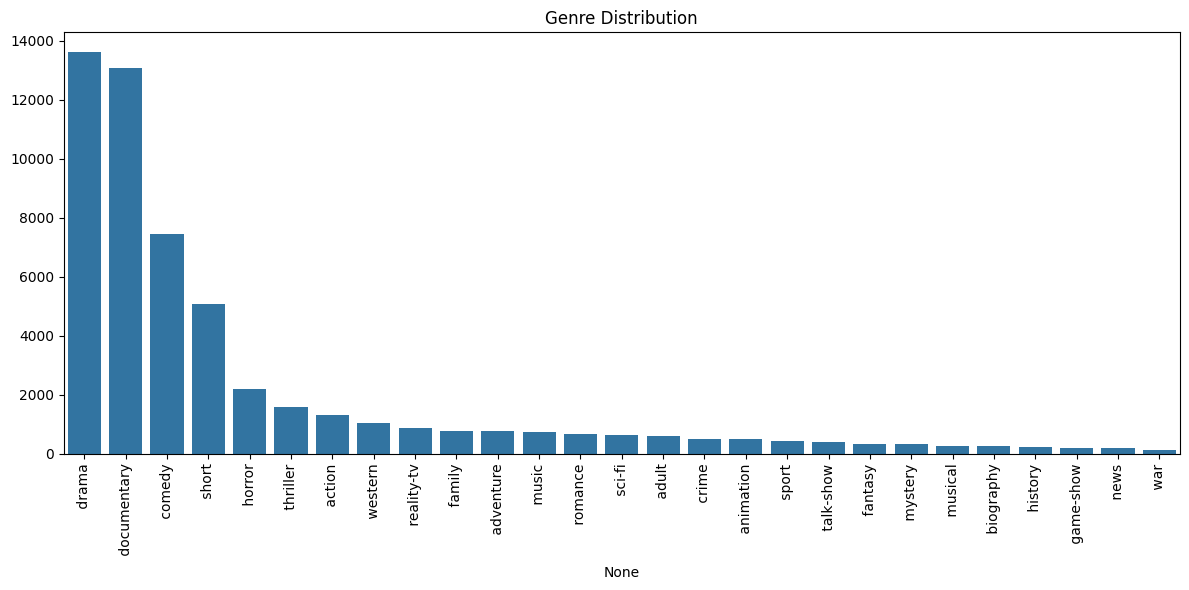

✅ Genre distribution plot displayed.

🎯 Script completed successfully!


In [7]:
# Evaluation
print("\n🔵 Evaluating model performance...")
print("Validation Accuracy Score:", accuracy_score(y_val, y_pred))
print("F1 Score (micro):", f1_score(y_val, y_pred, average='micro'))
print("F1 Score (macro):", f1_score(y_val, y_pred, average='macro'))
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred, target_names=mlb.classes_))

# Save Models, Vectorizer, Label Encoder
print("\n🔵 Saving models, vectorizer, and label encoder with pickle...")

with open('random_forest_models.pkl', 'wb') as f:
    pickle.dump(models, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('label_binarizer.pkl', 'wb') as f:
    pickle.dump(mlb, f)

print("✅ Models, vectorizer, and label encoder saved successfully.")

# Optional: Plot Genre Distribution
print("\n🔵 Plotting genre distribution...")
all_genres = [genre for sublist in df_train['Genre'] for genre in sublist]
genre_freq = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=genre_freq.index, y=genre_freq.values)
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print("✅ Genre distribution plot displayed.")

print("\n🎯 Script completed successfully!")
